(1) In this lab we will review some basics of python scientific toolkits

Consider the function 
f(x) = $\exp(-(x-2)^2)+\exp(-\frac{(x-6)^2}{10})+\frac{1}{x^2+1}$


Plot the function in the range $[-10,10]$ using matplotlib 





x= [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
y= [0.00990099 0.01233724 0.01579109 0.02091427 0.02897131 0.0426762
 0.06870266 0.12676086 0.28948526 0.79890401 0.94703932 1.26544679
 1.1187852  0.71216021 0.89574638 1.02454864 0.95245608 0.7141635
 0.43183459 0.21179751]


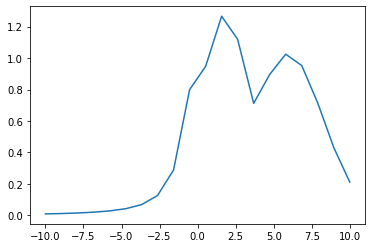

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 20)
print('x=',x)
y=np.exp(-1*np.power(x-2,2))+np.exp(-1*np.power(x-6,2)/10)+(1/(np.power(x,2)+1))
print('y=',y)
plt.plot(x, y) 
plt.show()

(2) Sample the function uniformly with 500 samples on [-10,10]

First lets approximate this with linear model $f(x)=wx+b$. Use sklearn and LinearRegression() to fit the function. Plot the approximation and compute the mean squared error. Repeat using the sklearn.neural_network.MLPRegressor and a 1 hidden layer network with 20 units, you may set all other settings to sklearn default for this classifier. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html



LinearRegression
Coefficients: 
 [[0.05213726]]
Mean squared error: 0.10
Coefficient of determination: 0.47


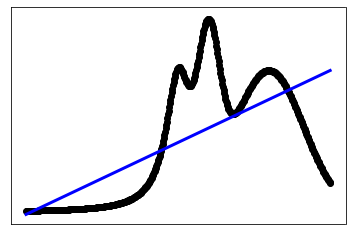

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor
Mean squared error: 0.03
Coefficient of determination: 0.86


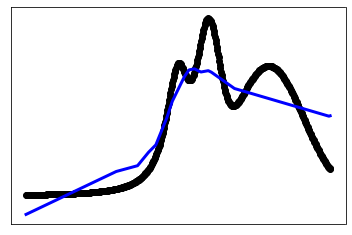

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
x = np.linspace(-10, 10, 500)
# print('x=',x)
y=np.exp(-1*np.power(x-2,2))+np.exp(-1*np.power(x-6,2)/10)+(1/(np.power(x,2)+1))
# y=(x+x)/2
# print('y=',y)
x=x.reshape(-1, 1)
# print('x=',x)
y=y.reshape(-1, 1)
# print('y=',y)
# # Split the data into training/testing sets
# X_train = x[:-20]
# X_test = x[-20:]

# # Split the targets into training/testing sets
# y_train = y[:-20]
# y_test = y[-20:]
################################# LinearRegression #######################################
regr = LinearRegression().fit(x, y)
y_pred = regr.predict(x)
# The coefficients
print('LinearRegression')
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))
# Plot outputs
plt.scatter(x,y,  color='black')
plt.plot(x,y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
################################ MLPRegressor ######################################
# X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=1)
regr = MLPRegressor(hidden_layer_sizes=(20),random_state=1, max_iter=600).fit(x, y)
y_pred = regr.predict(x)
print('MLPRegressor')
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))
# Plot outputs
plt.scatter(x,y,  color='black')
plt.plot(x,y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()



(3) Use *sklearn.datasets* library to generate classification datasets using the *sklearn.datasets.make_classification*.

(a) Create binary classification datasets with  2, 10, 50 and 100 dimensions, with 50 and 500 samples for training and 5000 for testing. Create linear and non-linearly separable datasets. In total there should be 4 x 2 x 2 =16 datasets. 

Alternatively to using *make classification* you may select a method of your choosing to construct the synthetic datasets.


https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets


In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

# plt.figure(figsize=(8, 8))
# plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

# plt.subplot(322)

dims=[2,10,50,100]
# dims=[10]
samples_size=[5050,5500]
#binary_datasets=['notseparable',dim,samples_size,samples,X_train, X_test, y_train, y_test]
binary_datasets=[]
for dim in dims:
    for s_size in samples_size :
        separable = True
        while  separable:
            samples = make_classification(n_samples=s_size, n_features=dim, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
            red = samples[0][samples[1] == 0]
            blue = samples[0][samples[1] == 1]
            separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
        X_train, X_test, y_train, y_test=train_test_split(samples[0], samples[1], test_size=5000/s_size, random_state=42)
        binary_datasets.append(['notseparable',dim,s_size-5000,samples, X_train, X_test, y_train, y_test])
        #######################################
        separable = False
        while not separable:
            samples = make_classification(n_samples=s_size, n_features=dim, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=-1)
            red = samples[0][samples[1] == 0]
            blue = samples[0][samples[1] == 1]
            separable = any([red[:, k].max() < blue[:, k].min() or red[:, k].min() > blue[:, k].max() for k in range(2)])
        X_train, X_test, y_train, y_test=train_test_split(samples[0], samples[1], test_size=5000/s_size, random_state=42)
        binary_datasets.append(['separable',dim,s_size-5000,samples, X_train, X_test, y_train, y_test])

print("datasets count=",len(binary_datasets))
# print(binary_datasets)

datasets count= 16


(b) In the dataset with 50 samples and  linearly separable for each case measure the average distance between points and visualize this in a plot with dimension (2,10,50,100) on the x-axis and average distance between points on the y-axis.


2
10
50
100


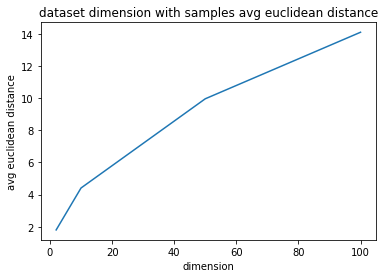

In [5]:
from scipy.spatial.distance import pdist
dim=[]
avg=[]
#binary_datasets=['notseparable',dim,samples_size,samples,X_train, X_test, y_train, y_test]
for ds in binary_datasets:
    if ds[0]=="separable" and ds[2]==50 :
        print(ds[1])
        # print(ds[3])
        Y = pdist(ds[3][0], 'euclidean')
        Y=sum(Y)/len(Y)
        dim.append(ds[1])
        avg.append(Y)
        
plt.plot(dim,avg) 
# naming the x axis 
plt.xlabel('dimension') 
# naming the y axis 
plt.ylabel('avg euclidean distance') 
# giving a title to my graph 
plt.title('dataset dimension with samples avg euclidean distance') 
# function to show the plot 
plt.show() 

(c) Visualize each of the datasets you created in 2 dimensions. For higher-dimensional (10,50,100) data use both PCA and t-sne from the *sklearn* package to create these visualizations in 2 dimensions. 

Explained variation per principal component: [0.56585566 0.43414434]
Explained variation per principal component: [0.51397042 0.48602958]
Explained variation per principal component: [0.55425333 0.44574667]
Explained variation per principal component: [0.50849676 0.49150324]
Explained variation per principal component: [0.14812379 0.10099039]
Explained variation per principal component: [0.10870507 0.1046207 ]
Explained variation per principal component: [0.14201088 0.10021307]
Explained variation per principal component: [0.11177682 0.10437503]
Explained variation per principal component: [0.02864554 0.02308176]
Explained variation per principal component: [0.0232195  0.02311883]
Explained variation per principal component: [0.03554337 0.02255594]
Explained variation per principal component: [0.02351861 0.02257273]
Explained variation per principal component: [0.01261151 0.01252808]
Explained variation per principal component: [0.01259351 0.01219849]
Explained variation per principal 

[t-SNE] Indexed 5050 samples in 0.654s...
[t-SNE] Computed neighbors for 5050 samples in 17.677s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5050
[t-SNE] Computed conditional probabilities for sample 2000 / 5050
[t-SNE] Computed conditional probabilities for sample 3000 / 5050
[t-SNE] Computed conditional probabilities for sample 4000 / 5050
[t-SNE] Computed conditional probabilities for sample 5000 / 5050
[t-SNE] Computed conditional probabilities for sample 5050 / 5050
[t-SNE] Mean sigma: 1.983422
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.556244
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[t-SNE] Computing 121 nearest neighb

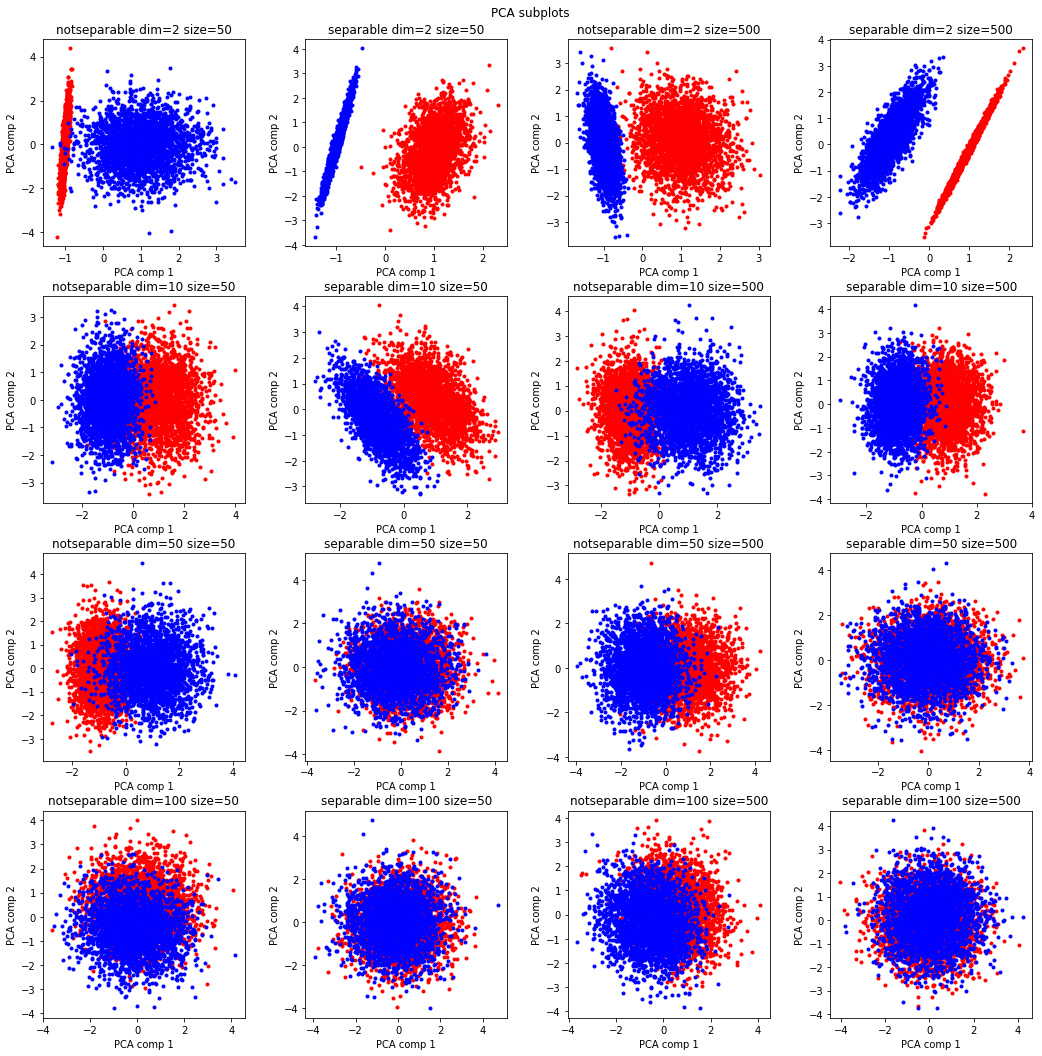

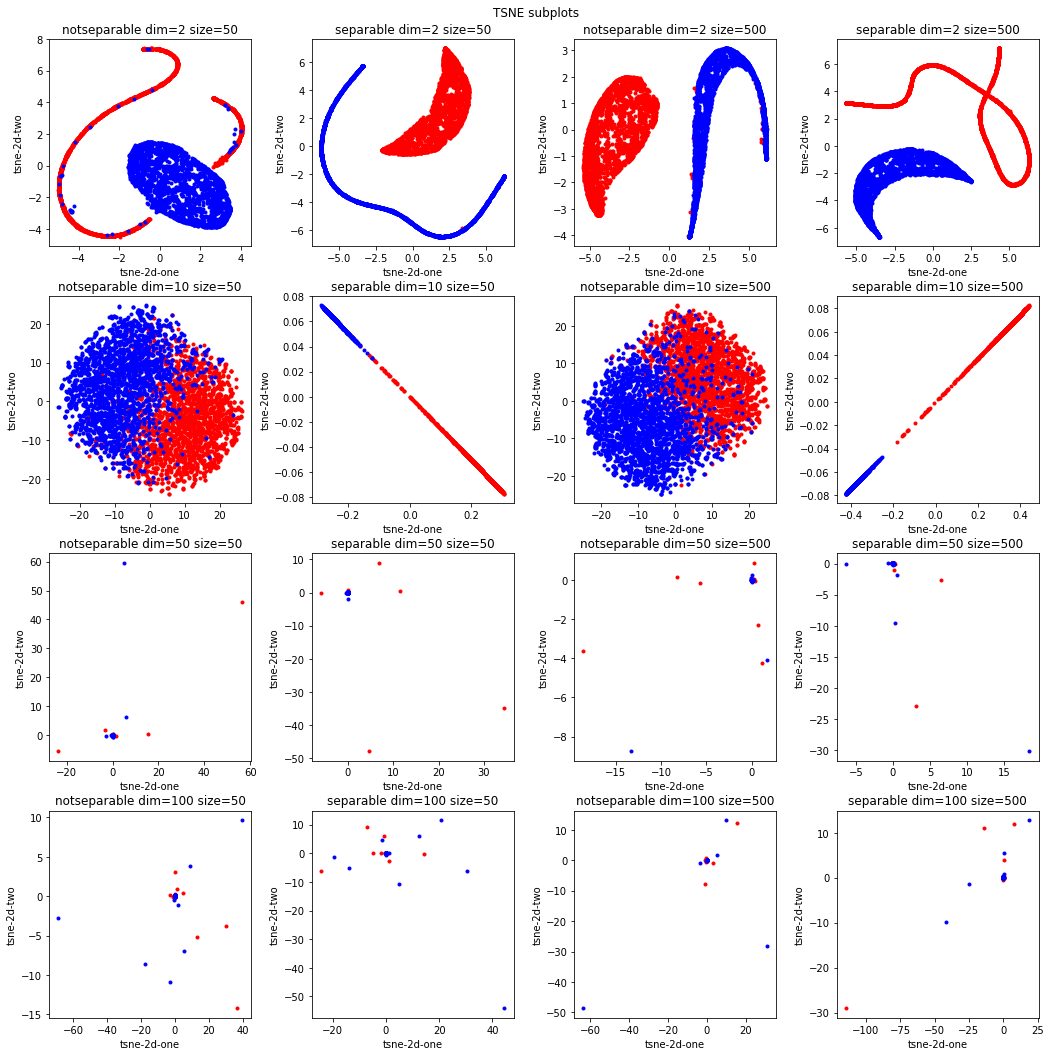

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
fig1, axs1 = plt.subplots(4,4,figsize=(15,15))
fig1.suptitle('PCA subplots')
fig1.tight_layout(pad=3.0)
fig1.subplots_adjust(top=0.95)
#binary_datasets=['notseparable',dim,samples_size,samples,X_train, X_test, y_train, y_test]
##############################PCA#############################
ds_idx=0
for ds in binary_datasets:
    pca_ds = PCA(n_components=2)
    principalComponents_breast = pca_ds.fit_transform(ds[3][0])
    principal_Df = pd.DataFrame(data = principalComponents_breast, columns = ['PCA comp 1', 'PCA comp 2'])
    lst=ds[3][1].tolist();
#     print(lst)
    principal_Df['y']=lst
    
    red = principal_Df[principal_Df['y'] == 0]
    blue = principal_Df[principal_Df['y'] == 1]

    axs1[ds_idx//4,ds_idx%4].plot(red['PCA comp 1'], red['PCA comp 2'], 'r.')
    axs1[ds_idx//4,ds_idx%4].plot(blue['PCA comp 1'], blue['PCA comp 2'],  'b.')
    title=str(ds[0])+' dim='+str(ds[1])+' size='+str(ds[2])
    axs1[ds_idx//4,ds_idx%4].set_title(title)
    axs1[ds_idx//4,ds_idx%4].set(xlabel='PCA comp 1', ylabel='PCA comp 2')
    ds_idx=ds_idx+1
#     print(principal_Df.tail())
    print('Explained variation per principal component: {}'.format(pca_ds.explained_variance_ratio_))
#     sns.scatterplot(
#     x="PCA comp 1", y="PCA comp 2",
#     hue="y",
#     palette=sns.color_palette("hls", 2),
#     data=principal_Df,
#     legend="full",
#     alpha=0.3)
    
##########################TSNE################################
fig2, axs2 = plt.subplots(4,4,figsize=(15,15))
fig2.suptitle('TSNE subplots')
fig2.tight_layout(pad=3.0)
fig2.subplots_adjust(top=0.95)
ds_idx=0
for ds in binary_datasets:
#     ds=binary_datasets[0]
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
    tsne_results = tsne.fit_transform(ds[3][0])
    df_tsne = pd.DataFrame(data = tsne_results, columns = ['tsne-2d-one', 'tsne-2d-two'])
    lst=ds[3][1].tolist();
    df_tsne['y']=lst
#     print(lst)
    red = df_tsne[df_tsne['y'] == 0]
    blue = df_tsne[df_tsne['y'] == 1]

    axs2[ds_idx//4,ds_idx%4].plot(red['tsne-2d-one'], red['tsne-2d-two'], 'r.')
    axs2[ds_idx//4,ds_idx%4].plot(blue['tsne-2d-one'], blue['tsne-2d-two'],  'b.')
    title=str(ds[0])+' dim='+str(ds[1])+' size='+str(ds[2])
    axs2[ds_idx//4,ds_idx%4].set_title(title)
    axs2[ds_idx//4,ds_idx%4].set(xlabel='tsne-2d-one', ylabel='tsne-2d-two')
    ds_idx=ds_idx+1


(d) Fit a linear model of your choice from the sklearn library to each of these cases and report accuracy and AUC 

In [36]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,auc
from sklearn.metrics import roc_auc_score
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd
#binary_datasets=['notseparable',dim,samples_size,samples,X_train, X_test, y_train, y_test]
############################LogisticRegression######################## 
print('LogisticRegression Model')
for ds in binary_datasets:
    LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    LR.fit(ds[4], ds[6])
    y_pred=LR.predict(ds[5])
    AUC=roc_auc_score(ds[7], LR.predict_proba(ds[5])[:, 1])   
    print("dataset[",ds[0],",",ds[1],",",ds[2],"] acc=",accuracy_score(ds[7], y_pred),"\t AUC=",AUC)
    
############################RandomForestClassifier######################## 
print('\nRandomForestClassifier Model')
for ds in binary_datasets:
    RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    RF.fit(ds[4], ds[6])
    y_pred=RF.predict(ds[5])
    AUC=roc_auc_score(ds[7], RF.predict_proba(ds[5])[:, 1])   
    print("dataset[",ds[0],",",ds[1],",",ds[2],"] acc=",accuracy_score(ds[7], y_pred),"\t AUC=",AUC)
   

LogisticRegression Model
dataset[ notseparable , 2 , 50 ] acc= 0.9724 	 AUC= 0.999820477127634
dataset[ separable , 2 , 50 ] acc= 0.9996 	 AUC= 1.0
dataset[ notseparable , 2 , 500 ] acc= 0.8832 	 AUC= 0.9559689164868193
dataset[ separable , 2 , 500 ] acc= 1.0 	 AUC= 1.0
dataset[ notseparable , 10 , 50 ] acc= 0.985 	 AUC= 0.9974135983447029
dataset[ separable , 10 , 50 ] acc= 0.9978 	 AUC= 0.9999969599922175
dataset[ notseparable , 10 , 500 ] acc= 0.9944 	 AUC= 0.9998633521072178
dataset[ separable , 10 , 500 ] acc= 1.0 	 AUC= 1.0
dataset[ notseparable , 50 , 50 ] acc= 0.8738 	 AUC= 0.954870211116935
dataset[ separable , 50 , 50 ] acc= 0.9198 	 AUC= 0.9764284799999999
dataset[ notseparable , 50 , 500 ] acc= 0.9542 	 AUC= 0.9725652819760242
dataset[ separable , 50 , 500 ] acc= 1.0 	 AUC= 1.0
dataset[ notseparable , 100 , 50 ] acc= 0.789 	 AUC= 0.875321580463076
dataset[ separable , 100 , 50 ] acc= 0.7926 	 AUC= 0.8944031721208693
dataset[ notseparable , 100 , 500 ] acc= 0.92 	 AUC= 0.974